# Statistical analysis of course evaluation data

In [3]:
import pandas as pd

In [4]:
eval_df = pd.read_csv('../backend/src/data/course_eval_evaluations.csv')
offering_df = pd.read_csv('../backend/src/data/course_eval_offerings.csv')
prof_df = pd.read_csv('../backend/src/data/course_eval_professors.csv')
course_df = pd.read_csv('../backend/src/data/course_eval_courses.csv')
e_o_merge = pd.merge(eval_df, offering_df, how='inner', on='offering_id')
e_o_p_merge = pd.merge(e_o_merge, prof_df, how='inner', on='prof_id')
merged_df = pd.merge(e_o_p_merge, course_df, how='inner', on='course_id')


In [5]:
merged_df.columns

Index(['eval_id', 'offering_id', 'ins1', 'ins2', 'ins3', 'ins4', 'ins5',
       'ins6', 'artsci1', 'artsci2', 'artsci3', 'invited', 'responded',
       'prof_id', 'course_id', 'section', 'year', 'semester', 'first_name',
       'last_name', 'department', 'code', 'title'],
      dtype='object')

In [6]:
merged_df.isna().sum()

eval_id           0
offering_id       0
ins1              0
ins2              0
ins3              2
ins4              0
ins5              0
ins6              0
artsci1        3540
artsci2         207
artsci3         200
invited          13
responded         0
prof_id           0
course_id         0
section           0
year              0
semester          0
first_name        0
last_name         0
department        0
code             10
title             2
dtype: int64

In [7]:
merged_df[merged_df.isna().any(axis=1)]

,eval_id,offering_id,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,...,prof_id,course_id,section,year,semester,first_name,last_name,department,code,title
85,86,87,4.6,4.7,4.8,4.4,4.4,4.5,NaN,4.1,...,13,18,LEC0101,2013,Winter,Barbara,Ballyk,ANA,ANA300Y1,Human Anat Histol
86,87,88,4.4,4.5,3.7,3.9,3.9,4.0,NaN,3.6,...,18,19,LEC0101,2013,Winter,Cindi,Morshead,ANA,ANA301H1,Human Embryology
87,88,89,4.4,4.5,3.7,3.9,3.9,4.0,NaN,3.6,...,27,19,LEC0101,2013,Winter,Ian,Taylor,ANA,ANA301H1,Human Embryology
88,89,90,4.4,4.5,4.5,3.9,3.9,4.0,NaN,3.6,...,28,19,LEC0101,2013,Winter,Mike,Wiley,ANA,ANA301H1,Human Embryology
92,93,94,4.7,4.7,4.7,4.5,4.4,4.3,NaN,4.2,...,23,18,LEC0101,2013,Summer,Judith,Laprade,ANA,ANA300Y1,Human Anat Histol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,43994,43961,4.6,4.6,4.8,4.4,4.5,4.5,NaN,3.0,...,6625,4940,LEC0101,2013,Summer,Natalie,Kouri-Towe,WGSI,WGS271Y1,Gender in Pop Culture
43994,43995,43962,4.0,3.6,4.9,4.4,4.1,3.9,NaN,3.6,...,6644,4949,LEC5101,2013,Summer,Lindsay,Bell,WGSI,WGS334H1,Spe Top Women & Gender
43995,43996,43963,4.8,4.6,4.9,4.4,4.4,4.6,NaN,3.1,...,6635,4953,LEC0101,2013,Summer,Hannah,Dyer,WGSI,WGS335H1,Spe Top Women & Gender
43996,43997,43964,4.3,4.3,4.5,3.7,4.1,4.0,NaN,3.6,...,4477,4966,LEC0101,2013,Summer,Patricia,Durish,WGSI,WGS372H1,Women & Psych/Psycho


In [8]:
merged_df[merged_df["ins3"].isna()]


,eval_id,offering_id,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,...,prof_id,course_id,section,year,semester,first_name,last_name,department,code,title
36291,36292,36261,4.2,4.2,NaN,3.6,3.7,4.1,NaN,3.3,...,5432,3552,LEC5101,2012,Fall,Nicholas,Rule,PSY,PSY321H1,Cross-Cultural Psychology
36309,36310,36279,4.2,4.3,NaN,4.4,3.7,4.3,NaN,3.3,...,5432,3575,LEC0101,2012,Fall,Nicholas,Rule,PSY,PSY420H1,Social Psychology Seminar


## For handling missing values in artsci1, they make up aorund 8%. quite a lot so will replace NaN with mean(),

In [9]:
reg_df = merged_df.copy() # regression_dataframe
reg_df

,eval_id,offering_id,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,...,prof_id,course_id,section,year,semester,first_name,last_name,department,code,title
0,1,2,4.5,4.7,4.8,4.7,4.8,4.6,4.8,2.5,...,2,2,LEC0101,2025,Winter,Alfred,Oduro,AFR,AFR199H1,Africa in Toronto
1,2,3,4.6,4.6,4.4,4.3,4.4,4.7,4.9,3.4,...,3,3,LEC0101,2025,Winter,Wumi,Asubiaro Dada,AFR,AFR250Y1,Africa: 21st Century
2,3,4,4.6,4.6,4.7,4.3,4.4,4.7,4.7,3.4,...,4,3,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR250Y1,Africa: 21st Century
3,4,5,4.8,4.8,4.9,4.6,4.6,4.7,5.0,3.1,...,4,4,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR150Y1,Africa: Critical Introduction
4,5,6,4.8,4.8,4.4,4.6,4.6,4.7,4.3,3.1,...,5,4,LEC0101,2025,Winter,Aggrey,Wasike,AFR,AFR150Y1,Africa: Critical Introduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44020,44021,43988,4.1,4.1,4.1,4.2,4.6,3.7,4.0,3.7,...,6633,4942,LEC0101,2022,Winter,Nikoli,Attai,WGSI,WGS376H1,Studies in Queer & Trans
44021,44022,43989,4.5,4.3,4.5,4.1,4.3,4.3,4.5,3.6,...,6603,4939,LEC0101,2022,Winter,Asmita,Bhutani Vij,WGSI,WGS355H1,World Gendered Labour
44022,44023,43990,4.9,4.9,4.9,4.7,4.9,4.7,4.9,3.3,...,6616,4941,LEC0101,2022,Winter,Vanbasten,Noronha de Araujo,WGSI,WGS442H1,Toxic World Decolonial Futures
44023,44024,43991,4.3,4.2,4.6,4.3,4.4,4.2,4.6,3.2,...,5758,4946,LEC0101,2022,Winter,Rinaldo,Walcott,WGSI,WGS275H1,Men & Masculinities


In [10]:
reg_df['artsci1'] = reg_df['artsci1'].fillna(reg_df['artsci1'].mean())

In [11]:
reg_df

,eval_id,offering_id,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,...,prof_id,course_id,section,year,semester,first_name,last_name,department,code,title
0,1,2,4.5,4.7,4.8,4.7,4.8,4.6,4.8,2.5,...,2,2,LEC0101,2025,Winter,Alfred,Oduro,AFR,AFR199H1,Africa in Toronto
1,2,3,4.6,4.6,4.4,4.3,4.4,4.7,4.9,3.4,...,3,3,LEC0101,2025,Winter,Wumi,Asubiaro Dada,AFR,AFR250Y1,Africa: 21st Century
2,3,4,4.6,4.6,4.7,4.3,4.4,4.7,4.7,3.4,...,4,3,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR250Y1,Africa: 21st Century
3,4,5,4.8,4.8,4.9,4.6,4.6,4.7,5.0,3.1,...,4,4,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR150Y1,Africa: Critical Introduction
4,5,6,4.8,4.8,4.4,4.6,4.6,4.7,4.3,3.1,...,5,4,LEC0101,2025,Winter,Aggrey,Wasike,AFR,AFR150Y1,Africa: Critical Introduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44020,44021,43988,4.1,4.1,4.1,4.2,4.6,3.7,4.0,3.7,...,6633,4942,LEC0101,2022,Winter,Nikoli,Attai,WGSI,WGS376H1,Studies in Queer & Trans
44021,44022,43989,4.5,4.3,4.5,4.1,4.3,4.3,4.5,3.6,...,6603,4939,LEC0101,2022,Winter,Asmita,Bhutani Vij,WGSI,WGS355H1,World Gendered Labour
44022,44023,43990,4.9,4.9,4.9,4.7,4.9,4.7,4.9,3.3,...,6616,4941,LEC0101,2022,Winter,Vanbasten,Noronha de Araujo,WGSI,WGS442H1,Toxic World Decolonial Futures
44023,44024,43991,4.3,4.2,4.6,4.3,4.4,4.2,4.6,3.2,...,5758,4946,LEC0101,2022,Winter,Rinaldo,Walcott,WGSI,WGS275H1,Men & Masculinities


## Drop empty artsci3, 2, and ins3 since they make up a tiny portion of the sample

In [12]:
reg_df = reg_df.dropna(subset=['artsci3', 'artsci2', 'ins3'])
reg_df

,eval_id,offering_id,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,...,prof_id,course_id,section,year,semester,first_name,last_name,department,code,title
0,1,2,4.5,4.7,4.8,4.7,4.8,4.6,4.8,2.5,...,2,2,LEC0101,2025,Winter,Alfred,Oduro,AFR,AFR199H1,Africa in Toronto
1,2,3,4.6,4.6,4.4,4.3,4.4,4.7,4.9,3.4,...,3,3,LEC0101,2025,Winter,Wumi,Asubiaro Dada,AFR,AFR250Y1,Africa: 21st Century
2,3,4,4.6,4.6,4.7,4.3,4.4,4.7,4.7,3.4,...,4,3,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR250Y1,Africa: 21st Century
3,4,5,4.8,4.8,4.9,4.6,4.6,4.7,5.0,3.1,...,4,4,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR150Y1,Africa: Critical Introduction
4,5,6,4.8,4.8,4.4,4.6,4.6,4.7,4.3,3.1,...,5,4,LEC0101,2025,Winter,Aggrey,Wasike,AFR,AFR150Y1,Africa: Critical Introduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44020,44021,43988,4.1,4.1,4.1,4.2,4.6,3.7,4.0,3.7,...,6633,4942,LEC0101,2022,Winter,Nikoli,Attai,WGSI,WGS376H1,Studies in Queer & Trans
44021,44022,43989,4.5,4.3,4.5,4.1,4.3,4.3,4.5,3.6,...,6603,4939,LEC0101,2022,Winter,Asmita,Bhutani Vij,WGSI,WGS355H1,World Gendered Labour
44022,44023,43990,4.9,4.9,4.9,4.7,4.9,4.7,4.9,3.3,...,6616,4941,LEC0101,2022,Winter,Vanbasten,Noronha de Araujo,WGSI,WGS442H1,Toxic World Decolonial Futures
44023,44024,43991,4.3,4.2,4.6,4.3,4.4,4.2,4.6,3.2,...,5758,4946,LEC0101,2022,Winter,Rinaldo,Walcott,WGSI,WGS275H1,Men & Masculinities


In [13]:
reg_df.shape

(43816, 23)

In [14]:
features = merged_df[['ins1', 'ins2', 'ins3', 'ins4', 'ins5', 'ins6', 'artsci1', 'artsci2']]

# Compute correlation matrix (Pearson by default)
corr_matrix = features.corr()
print(corr_matrix)

             ins1      ins2      ins3      ins4      ins5      ins6   artsci1  \
ins1     1.000000  0.907375  0.777977  0.793612  0.773193  0.869593  0.762065   
ins2     0.907375  1.000000  0.795692  0.815754  0.798604  0.881865  0.763466   
ins3     0.777977  0.795692  1.000000  0.766440  0.759204  0.868826  0.928182   
ins4     0.793612  0.815754  0.766440  1.000000  0.940179  0.888227  0.725976   
ins5     0.773193  0.798604  0.759204  0.940179  1.000000  0.886820  0.721959   
ins6     0.869593  0.881865  0.868826  0.888227  0.886820  1.000000  0.833717   
artsci1  0.762065  0.763466  0.928182  0.725976  0.721959  0.833717  1.000000   
artsci2  0.022248 -0.023698 -0.120707 -0.099570 -0.151554 -0.159554 -0.117466   

          artsci2  
ins1     0.022248  
ins2    -0.023698  
ins3    -0.120707  
ins4    -0.099570  
ins5    -0.151554  
ins6    -0.159554  
artsci1 -0.117466  
artsci2  1.000000  


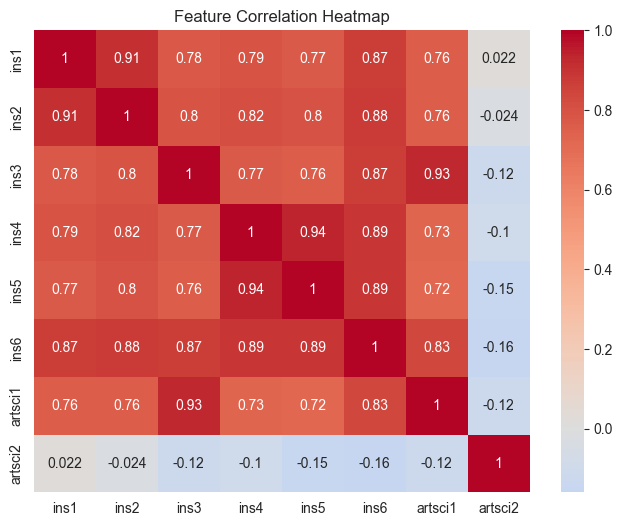

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## Substantial correlation coefficients exist between ins1-ins6, artsci1. This shows that all features except for artsci2 are multicollinear with each other. The implications of this is that the beta coefficients are not that interpretable. But multicollinearity doesn't bias predictions, just makes coefficients unreliable.

# Multilinear Regression to explore features that affect ARTSC3 (I would recommend this course)

In [16]:
from sklearn.model_selection import train_test_split

# Features and target
X = reg_df[['ins1', 'ins2', 'ins3', 'ins4', 'ins5', 'ins6', 'artsci1', 'artsci2']]
y = reg_df['artsci3']

# test size is % of data to keep for test, rdm state is an arbitrary fixed seed to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [17]:
print(f'x train data set has shape {X_train.shape} and x test has shape {X_test.shape}')

x train data set has shape (30671, 8) and x test has shape (13145, 8)


In [18]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const, y_train = X_train_const.align(y_train, join='inner', axis=0)

model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                artsci3   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.879e+04
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:45:37   Log-Likelihood:                 2904.5
No. Observations:               30671   AIC:                            -5791.
Df Residuals:                   30662   BIC:                            -5716.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3967      0.017     23.804      0.000       0.364       0.429
ins1           0.1608      0.007     24.685      0.000       0.148       0.174
ins2           0.0289      0.007      4.108      0.000       0.015       0.043
ins3           0.0266      0.006      4.740      0.000       0.016       0.038
ins4           0.0833      0.008     10.976      0.000       0.068       0.098
ins5           0.0659      0.007      8.859      0.000       0.051       0.081
ins6           0.6184      0.007     88.439      0.000       0.605       0.632
artsci1        0.0636      0.005     12.481      0.000       0.054       0.074
artsci2       -0.2013      0.003    -66.952      0.000      -0.207      -0.195
==============================================================================
Omnibus:                     1217.090   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2769.495
Skew:                          -0.245   Prob(JB):                         0.00
Kurtosis:                       4.388   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_train_const.shape

(30671, 9)

In [20]:
y_train.shape

(30671,)

In [21]:
print(X.index.equals(y.index))

True


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Add constant to X_test (same as training!)
X_test_const = sm.add_constant(X_test)
X_test_const, y_test = X_test_const.align(y_test, join='inner', axis=0)

# Predict on test set
y_pred = model.predict(X_test_const)

# RMSE
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared
r2_reg = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse_reg:.4f}")
print(f"Test R²: {r2_reg:.4f}")
print(f"On {len(X_test_const)} testing samples")

Test RMSE: 0.2217
Test R²: 0.8835
On 13145 testing samples


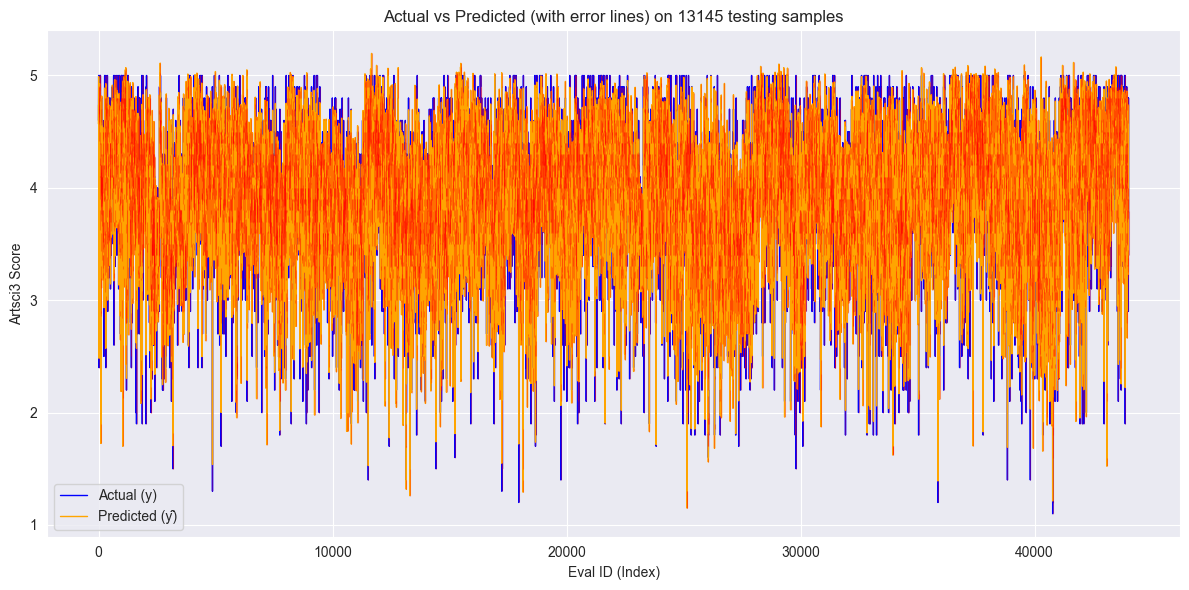

In [23]:
import matplotlib.pyplot as plt

# Step 1: Make sure eval_id is aligned with y_test
eval_ids = X_test_const.index  # this should match y_test's index

# Step 2: Plot actual vs predicted
plt.figure(figsize=(12, 6))

# Sort both Series by index so eval_ids are in ascending order
y_pred = y_pred.sort_index()
y_test = y_test.sort_index()
eval_ids = y_test.index  # now matches order

plt.plot(eval_ids, y_test, label='Actual (y)', color='blue', linewidth=1)
plt.plot(eval_ids, y_pred, label='Predicted (ŷ)', color='orange', linewidth=1)

# Step 3: Highlight errors (vertical lines)
for i in range(len(eval_ids)):
    actual = y_test.iloc[i]
    pred = y_pred.iloc[i]
    eid = eval_ids[i]  # still fine, assuming it's from a positional index

    plt.vlines(x=eid, ymin=min(actual, pred), ymax=max(actual, pred),
               color='red', alpha=0.3, linewidth=0.8)


plt.xlabel("Eval ID (Index)")
plt.ylabel("Artsci3 Score")
plt.title("Actual vs Predicted (with error lines) on 13145 testing samples")
plt.legend()
plt.tight_layout()
plt.show()


sample_size is 328 and len(eval_ids) is 13145


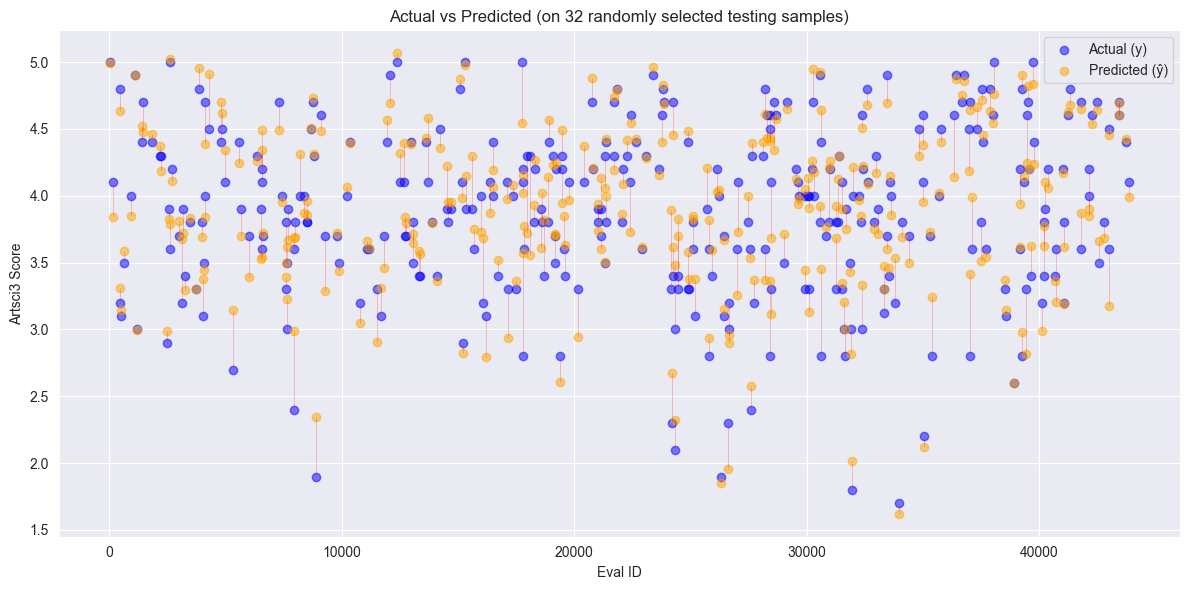

In [24]:
sample_size = len(eval_ids) // 40
print(f'sample_size is {sample_size} and len(eval_ids) is {len(eval_ids)}')
sample_idx = np.random.choice(eval_ids, size=sample_size, replace=False)

# Subset everything
y_test_sample = y_test.loc[sample_idx]
y_pred_sample = y_pred.loc[sample_idx]

plt.figure(figsize=(12, 6))
plt.scatter(sample_idx, y_test_sample, label='Actual (y)', alpha=0.5, color='blue')
plt.scatter(sample_idx, y_pred_sample, label='Predicted (ŷ)', alpha=0.5, color='orange')

# Highlight errors for this sample
for eid, actual, pred in zip(sample_idx, y_test_sample, y_pred_sample):
    plt.vlines(x=eid, ymin=min(actual, pred), ymax=max(actual, pred),
               color='red', alpha=0.3, linewidth=0.5)

plt.xlabel("Eval ID")
plt.ylabel("Artsci3 Score")
plt.title("Actual vs Predicted (on 32 randomly selected testing samples)")
plt.legend()
plt.tight_layout()
plt.show()


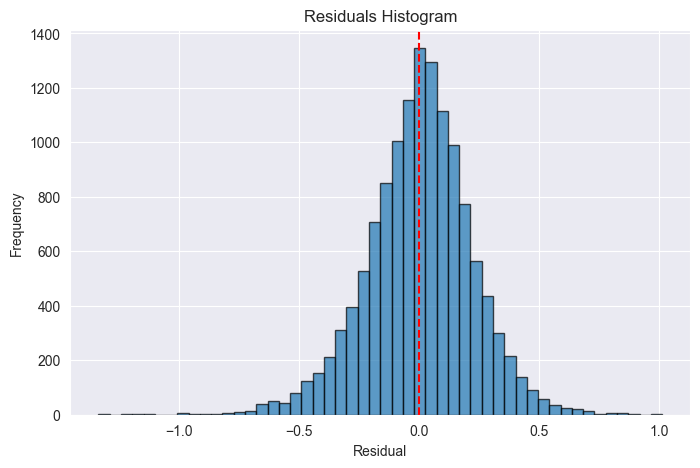

In [25]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()


## Residuals are normally distributed at 0 so the regression model is statistically significant

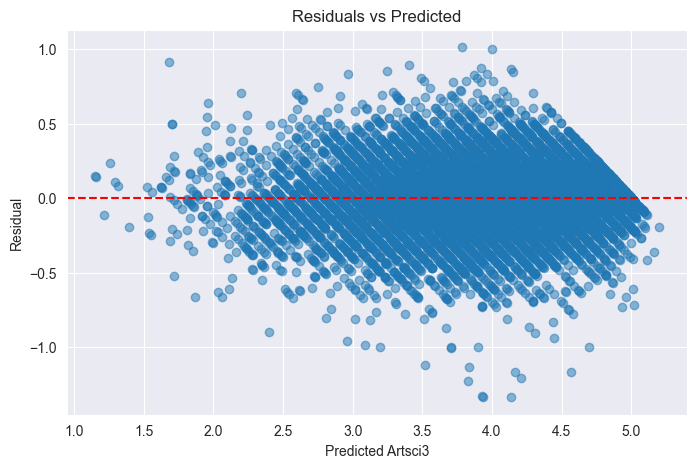

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Artsci3")
plt.ylabel("Residual")
plt.show()


In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = y_test - y_pred
bp_test = het_breuschpagan(residuals, X_test_const)
print(f"LM Stat: {bp_test[0]}, p-value: {bp_test[1]}")


LM Stat: 6.737933541897607, p-value: 0.565153567129254


### As the p value for the breush pagan test is $\approx 0.5 \gt 0.05$, we reject the null hypothesis so the residuals are not heteroscedastic

In [28]:
from IPython.display import display, Math, Markdown
display(Markdown("## Final Regression:"))
display(Math(r"""
\begin{aligned}
\hat{y}_{\text{artsci3}} =\;&
0.3967
+ 0.1608\,x_{\text{ins1}}
+ 0.0289\,x_{\text{ins2}}
+ 0.0266\,x_{\text{ins3}} \\
&+ 0.0833\,x_{\text{ins4}}
+ 0.0659\,x_{\text{ins5}}
+ 0.6184\,x_{\text{ins6}} \\
&+ 0.0636\,x_{\text{artsci1}}
- 0.2013\,x_{\text{artsci2}}.
\end{aligned}
"""))


## Final Regression:

<IPython.core.display.Math object>

In [29]:
display(Markdown("## Statistical model:"))
display(Math(r"""
\begin{aligned}
y_{\text{artsci3}} =\;&
0.3967
+ 0.1608\,x_{\text{ins1}}
+ 0.0289\,x_{\text{ins2}}
+ 0.0266\,x_{\text{ins3}} \\
&+ 0.0833\,x_{\text{ins4}}
+ 0.0659\,x_{\text{ins5}}
+ 0.6184\,x_{\text{ins6}} \\
&+ 0.0636\,x_{\text{artsci1}}
- 0.2013\,x_{\text{artsci2}} + \epsilon.
\end{aligned}
"""))

## Statistical model:

<IPython.core.display.Math object>

## Conclusion:
### artsci2 is the only predictor with a low VIF value of roughly 1.2, so it is not directly influenced by the other features. We see that workload (artsci2) is significantly and inversely associated with students’ likelihood to recommend the course (artsci3). For each one-unit increase in perceived workload, the predicted recommendation score decreases by about 0.20 on average. As for the rest of the $\beta$ coefficients, the magnitude and the sign can be misleading because the features are correlated meaning the model struggles to identify unique effects among the predictors.



### But since multicollinearity does not bias predictions, with a low RMSE value of around 0.22 and a high $R^2$ value of 0.8835 on the testing dataset, the regression model shows solid prediction abilities.### But since multicollinearity does not bias predictions, with a low RMSE value of around 0.22 and a high $R^2$ value of 0.8835 on the testing dataset, the regression model shows solid prediction abilities.

# Predicting artsci3 using xgboost model

In [30]:
import xgboost as xgb


In [31]:
xg_df = reg_df.copy()
# Features and target
X = xg_df[['ins1', 'ins2', 'ins3', 'ins4', 'ins5', 'ins6', 'artsci1', 'artsci2']]
y = xg_df['artsci3']

# test size is % of data to keep for test, rdm state is an arbitrary fixed seed to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [32]:
model_xgb = xgb.XGBRegressor(
    n_estimators=500,        # number of boosting rounds (trees)
    learning_rate=0.05,      # how much each tree contributes (smaller = slower but safer)
    max_depth=4,             # how deep each tree can go (controls complexity)
    subsample=0.8,           # sample fraction for each tree (helps generalization)
    colsample_bytree=0.8,    # fraction of features per tree
    random_state=42
)

model_xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
y_pred_xgb = model_xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Test RMSE: {rmse_xgb:.4f}")
print(f"XGBoost Test R²: {r2_xgb:.4f}")


XGBoost Test RMSE: 0.2183
XGBoost Test R²: 0.8871


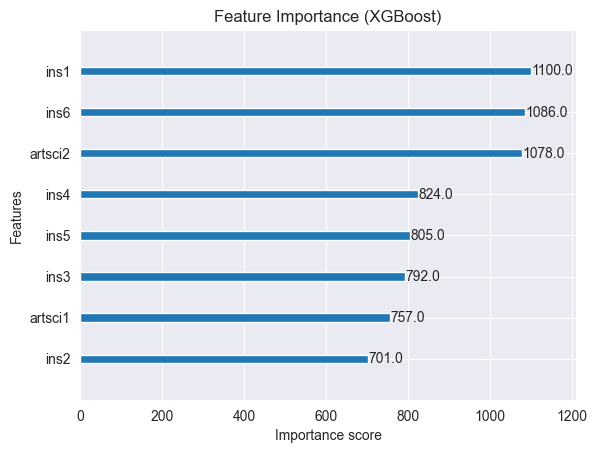

In [34]:
xgb.plot_importance(model_xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()
plt.close()

### Feature importance by weight / frequency counts how many times a feature was used to split/make a decision across all trees. A feature appearing frequently suggests that it's useful for making decisions, but it does not explain how big the impact of choosing that feature is on the prediction.

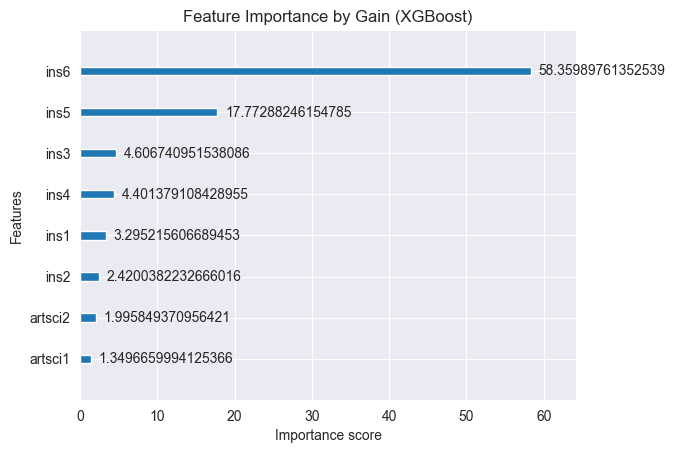

In [40]:
ax = xgb.plot_importance(model_xgb, importance_type='gain', max_num_features=10)

# Change the title using the Axes object
ax.set_title("Feature Importance by Gain (XGBoost)")

plt.show()


## Feature importance by gain shows the average improvement in the model's prediction from splits using a feature: how much each feature helped the model improve. We can see that ins6 is the largest contributer, meaning that splitting with ins6 reduces the residuals by the most, despite it not being the most frequently used feature to split.

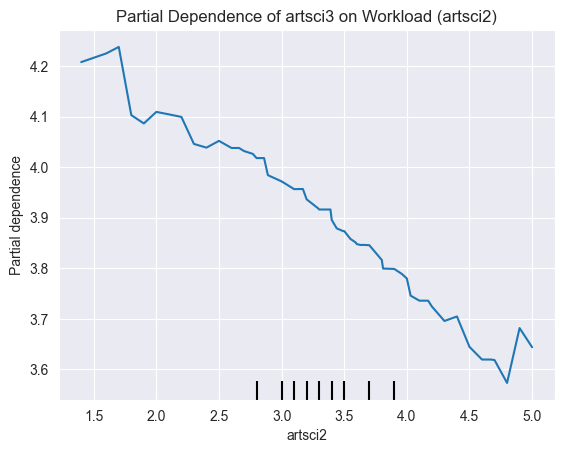

In [36]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model_xgb, X_test, features=['artsci2'])
plt.title("Partial Dependence of artsci3 on Workload (artsci2)")
plt.show()


- XGBoost doesn’t rely on inverting $X^{T}X$, so multicollinearity isn’t an issue:
    - Redundant features just compete for splits.
    - Feature importance may get spread out, but predictions stay stable
- xgboost handles non linear trends, unlike multi-linear regression
- handles interactions naturally. One branch could say if ins6 > 4.5 and artsci2 < 5, boost the prediction by 0.3. In multi-linear regression need to add interaction terms

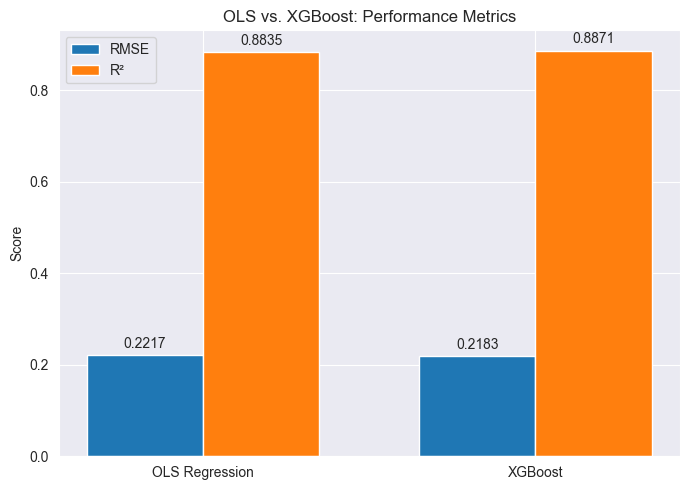

In [37]:
# Side-by-side grouped bars for RMSE and R²
models = ['OLS Regression', 'XGBoost']
rmse_values = [rmse_reg, rmse_xgb]
r2_values = [r2_reg, r2_xgb]
x = np.arange(len(models))  # positions for each model
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(7, 5))

bars1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
bars2 = ax.bar(x + width/2, r2_values, width, label='R²')

ax.set_ylabel('Score')
ax.set_title('OLS vs. XGBoost: Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with rounded values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
